In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Cargar dataset preparado previamente
df_partidos = pd.read_csv("partidos_cebollitas.csv")
df_partidos.head()


,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML


In [8]:
# Aplicar Normalización a tiros al arco (aprox. 0-15 tiros)
scaler_norm = MinMaxScaler()

df_partidos['tiros_arco_local_norm'] = scaler_norm.fit_transform(df_partidos[['tiros_arco_local']])
df_partidos['tiros_arco_visitante_norm'] = scaler_norm.fit_transform(df_partidos[['tiros_arco_visitante']])

# Ver resultados
print(df_partidos[['tiros_arco_local','tiros_arco_local_norm']].head(6))
print(df_partidos[['tiros_arco_visitante','tiros_arco_visitante_norm']].head(6))



   tiros_arco_local  tiros_arco_local_norm
0                12               1.000000
1                12               1.000000
2                10               0.777778
3                 3               0.000000
4                 7               0.444444
5                 8               0.555556
   tiros_arco_visitante  tiros_arco_visitante_norm
0                     6                   0.333333
1                     3                   0.000000
2                     7                   0.444444
3                     3                   0.000000
4                    12                   1.000000
5                    11                   0.888889


In [9]:
# Aplicar Estandarización a la posesión (%)
scaler_std = StandardScaler()

df_partidos['posesion_local_std'] = scaler_std.fit_transform(df_partidos[['posesion_local (%)']])
df_partidos['posesion_visitante_std'] = scaler_std.fit_transform(df_partidos[['posesion_visitante (%)']])

# Ver resultados
df_partidos[['posesion_local (%)','posesion_local_std']].head()


,posesion_local (%),posesion_local_std
0,54,0.624415
1,60,1.623479
2,55,0.790926
3,57,1.123947
4,52,0.291394


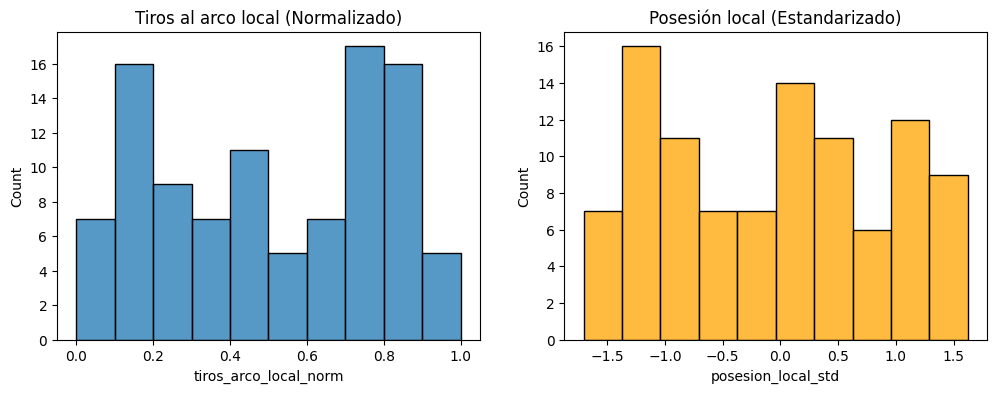

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12,4))

# Visualizar tiros al arco (Normalización)
sns.histplot(df_partidos['tiros_arco_local_norm'], bins=10, ax=ax[0])
ax[0].set_title("Tiros al arco local (Normalizado)")

# Visualizar posesión local (Estandarización)
sns.histplot(df_partidos['posesion_local_std'], bins=10, ax=ax[1], color='orange')
ax[1].set_title("Posesión local (Estandarizado)")

plt.show()
